<a href="https://colab.research.google.com/github/sharanbalu/crop_recommendation-_system/blob/main/Crop_recommendation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **About Dataset**

This dataset contains information on the levels of nitrogen, phosphorus, and potassium in soil, as well as temperature,humidity, pH, and rainfall, and their impact on the growth of crops. The data can be used to make data-driven recommendations for achieving optimal nutrient and environmental conditions to improve crop yield.

#**Importing Required libraries**

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn


In [4]:
# Reading dataset
data=pd.read_csv('/content/Crop_recommendation.csv')
data.head()

,Nitrogen,phosphorus,potassium,temperature,humidity,ph,rainfall,label,Unnamed: 8,Unnamed: 9
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice,NaN,NaN
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice,NaN,NaN
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice,NaN,NaN
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice,NaN,NaN
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice,NaN,NaN


#**Preprocessing**

In [5]:
# Checking null values

data.isna().sum()

Nitrogen          0
phosphorus        0
potassium         0
temperature       0
humidity          0
ph                0
rainfall          0
label             0
Unnamed: 8     2200
Unnamed: 9     2200
dtype: int64

1. Checked null values and shape of data
2. Found 2 columns are nul values these 2 are totally have missing values. So droping them

In [6]:
# Checking shape
data.shape

(2200, 10)

In [7]:
# Dropping the Unnamed columns

data=data.drop('Unnamed: 8', axis=1)
data=data.drop('Unnamed: 9', axis=1)

In [8]:
data.head()

,Nitrogen,phosphorus,potassium,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice


In [9]:
data.isna().sum()
# There is no missing values 

Nitrogen       0
phosphorus     0
potassium      0
temperature    0
humidity       0
ph             0
rainfall       0
label          0
dtype: int64

In [10]:
# dropping the duplicates if present

data.drop_duplicates()


,Nitrogen,phosphorus,potassium,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice
...,...,...,...,...,...,...,...,...
2195,107,34,32,26.774637,66.413269,6.780064,177.774507,coffee
2196,99,15,27,27.417112,56.636362,6.086922,127.924610,coffee
2197,118,33,30,24.131797,67.225123,6.362608,173.322839,coffee
2198,117,32,34,26.272418,52.127394,6.758793,127.175293,coffee


In [11]:
data.shape

(2200, 8)

In [12]:
data.describe()

,Nitrogen,phosphorus,potassium,temperature,humidity,ph,rainfall
count,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000
mean,50.551818,53.362727,48.149091,25.616244,71.481779,6.469480,103.463655
std,36.917334,32.985883,50.647931,5.063749,22.263812,0.773938,54.958389
min,0.000000,5.000000,5.000000,8.825675,14.258040,3.504752,20.211267
25%,21.000000,28.000000,20.000000,22.769375,60.261953,5.971693,64.551686
50%,37.000000,51.000000,32.000000,25.598693,80.473146,6.425045,94.867624
75%,84.250000,68.000000,49.000000,28.561654,89.948771,6.923643,124.267508
max,140.000000,145.000000,205.000000,43.675493,99.981876,9.935091,298.560117


# **Univariat Analysis**

Univariate analysis is a statistical analysis technique used to analyze a single variable at a time. It involves analyzing the distribution, central tendency, and dispersion of the variable. Univariate analysis helps in understanding the characteristics of the variable and can be useful in identifying outliers, trends, and patterns in the data.

**Outlier Detection**

**Visualize the data:** Plotting the data can help identify outliers visually. For example, box plots or scatter plots can help identify extreme values that fall outside of the main distribution.

**Nitrogen column**

Nitrogen is one of the most important nutrients for plant growth and development, and it is a critical component of healthy soil

{'whiskers': [<matplotlib.lines.Line2D at 0x7f8d897cca30>,
 'caps': [<matplotlib.lines.Line2D at 0x7f8d897ccf70>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f8d897cc790>],
 'medians': [<matplotlib.lines.Line2D at 0x7f8d897ed3d0>],
 'fliers': [<matplotlib.lines.Line2D at 0x7f8d897ed670>],
 'means': []}

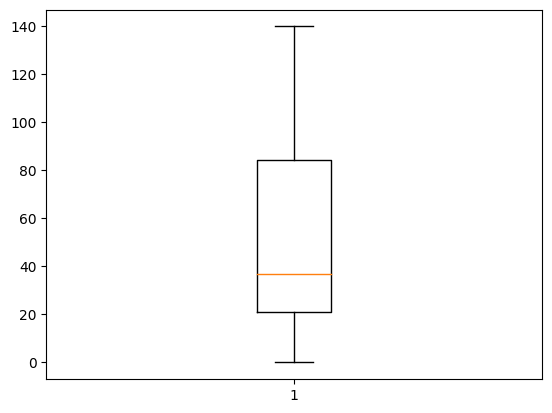

In [13]:
plt.boxplot(data['Nitrogen'])

# In this column there no outlier present

**phosphorus column**

Phosphorus is an essential nutrient for plant growth and is often found in soil in the form of phosphate ions (PO4³⁻). The availability of phosphorus in soil can vary depending on factors such as pH, organic matter content, and soil texture.

{'whiskers': [<matplotlib.lines.Line2D at 0x7f8d86ed8c40>,
 'caps': [<matplotlib.lines.Line2D at 0x7f8d86eea1c0>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f8d86ed89a0>],
 'medians': [<matplotlib.lines.Line2D at 0x7f8d86eea700>],
 'fliers': [<matplotlib.lines.Line2D at 0x7f8d86eea9a0>],
 'means': []}

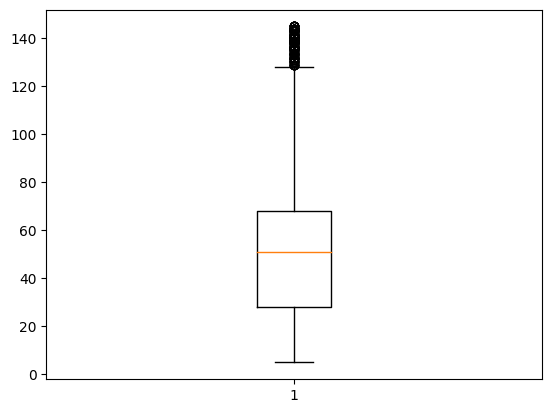

In [14]:
plt.boxplot(data['phosphorus'])

# Found outliers

<ipython-input-15-d3561ceacd60>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['phosphorus'])


<Axes: xlabel='phosphorus', ylabel='Density'>

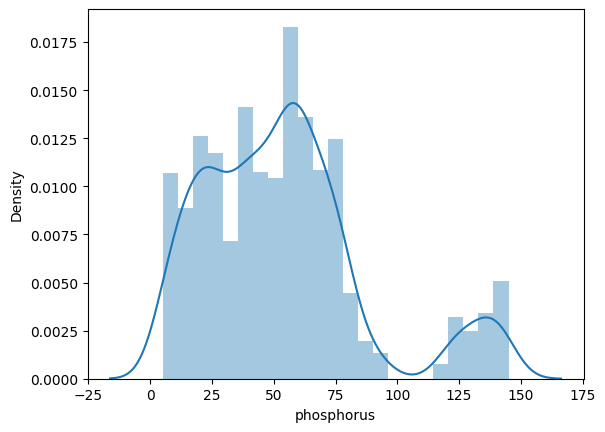

In [15]:
sns.distplot(data['phosphorus'])
#Checking distribution of Data

In [16]:
# IQR approach 
# defining the limit
# finding upper nad lower limit

q1= data['phosphorus'].quantile(0.25)
q3= data['phosphorus'].quantile(0.75)

iqr= q1-q3
lower_limit= q1 - 1.5 *iqr
upper_limit= q3 + 1.5 *iqr

In [17]:
# Removing outliers

new_data = data[(data['phosphorus'] < lower_limit) & (data['phosphorus'] > upper_limit)]
data = new_data


{'whiskers': [<matplotlib.lines.Line2D at 0x7f8d898ba970>,
 'caps': [<matplotlib.lines.Line2D at 0x7f8d84dbca90>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f8d84dbc820>],
 'medians': [<matplotlib.lines.Line2D at 0x7f8d84dbcfd0>],
 'fliers': [<matplotlib.lines.Line2D at 0x7f8d84d592b0>],
 'means': []}

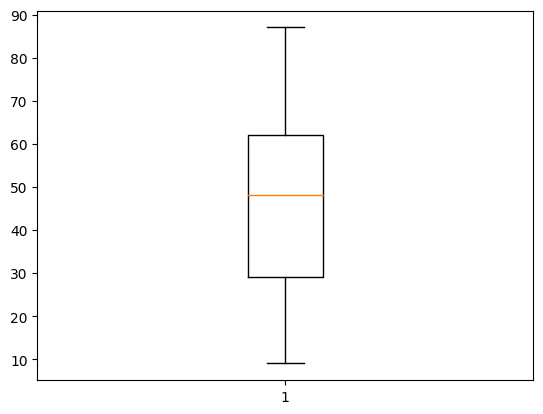

In [18]:
plt.boxplot(new_data['phosphorus'])
# Plot after removing outliers

<ipython-input-19-08978958ac3f>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['phosphorus'])


<Axes: xlabel='phosphorus', ylabel='Density'>

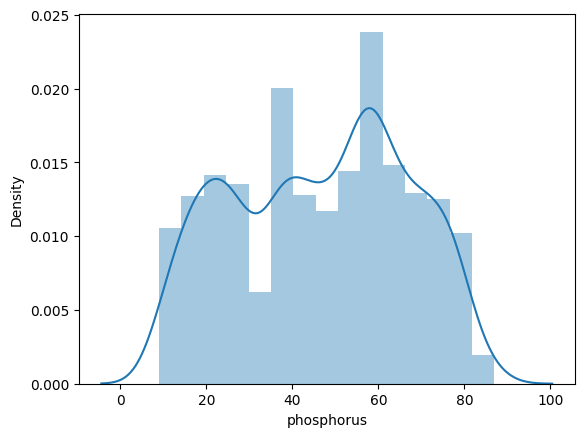

In [19]:
sns.distplot(data['phosphorus'])
# Distibution after outlier removel

**potassium column**

Soils with a pH between 6.0 and 7.0 are considered optimal for potassium availability,

{'whiskers': [<matplotlib.lines.Line2D at 0x7f8d84ccab20>,
 'caps': [<matplotlib.lines.Line2D at 0x7f8d84c5a0a0>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f8d84cca880>],
 'medians': [<matplotlib.lines.Line2D at 0x7f8d84c5a5e0>],
 'fliers': [<matplotlib.lines.Line2D at 0x7f8d84c5a880>],
 'means': []}

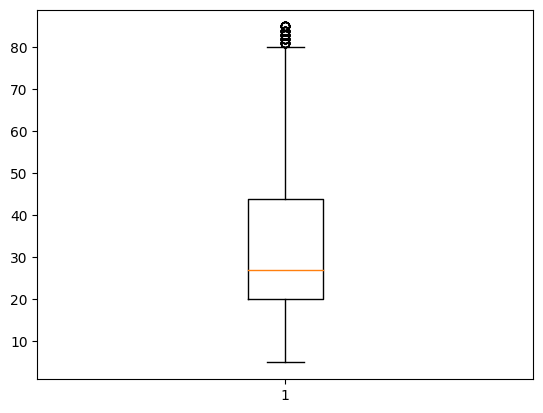

In [20]:
plt.boxplot(data['potassium'])

#outliers found

In [21]:
# Outlier treat
q1= data['potassium'].quantile(0.25)
q3= data['potassium'].quantile(0.75)

iqr= q1-q3
lower_limit= q1 - 1.5 *iqr
upper_limit= q3 + 1.5 *iqr

new_data = data[(data['potassium'] < lower_limit) & (data['potassium'] > upper_limit)]
data = new_data



{'whiskers': [<matplotlib.lines.Line2D at 0x7f8d84bcf490>,
 'caps': [<matplotlib.lines.Line2D at 0x7f8d84bcf9d0>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f8d84bcf1f0>],
 'medians': [<matplotlib.lines.Line2D at 0x7f8d84bcff10>],
 'fliers': [<matplotlib.lines.Line2D at 0x7f8d84bdc1f0>],
 'means': []}

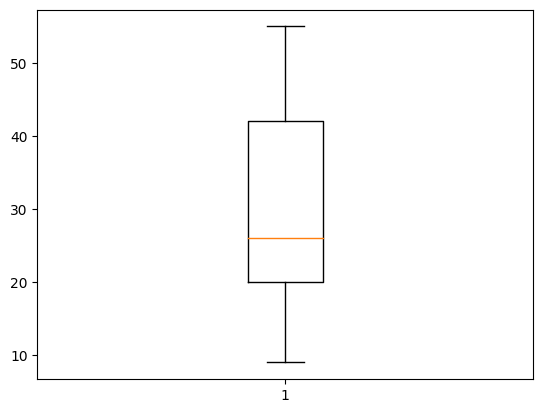

In [22]:
plt.boxplot(data['potassium'])
# After treating outliers

<ipython-input-23-1e59d86aff6c>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['potassium'])


<Axes: xlabel='potassium', ylabel='Density'>

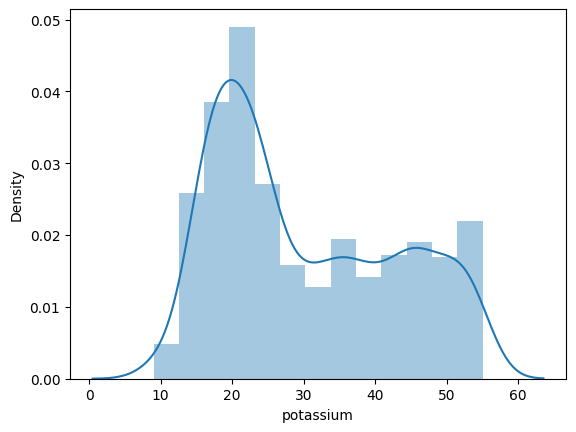

In [23]:
sns.distplot(data['potassium'])
# Distribution of data

**temperature	column**

{'whiskers': [<matplotlib.lines.Line2D at 0x7f8d84b4aca0>,
 'caps': [<matplotlib.lines.Line2D at 0x7f8d84ada250>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f8d84b4aa00>],
 'medians': [<matplotlib.lines.Line2D at 0x7f8d84ada790>],
 'fliers': [<matplotlib.lines.Line2D at 0x7f8d84b4bd30>],
 'means': []}

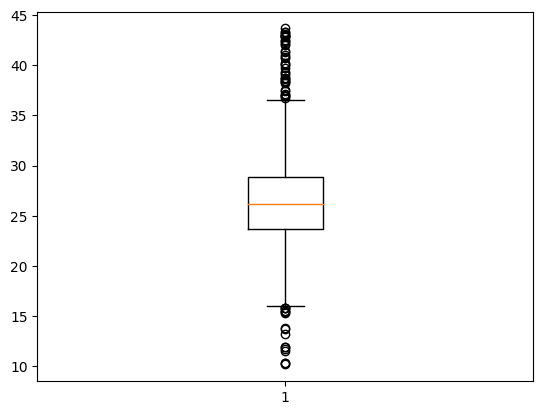

In [24]:
# Check outliers

plt.boxplot(data['temperature'])

# Found some outliers

In [25]:
# Treating outliers
q1= data['temperature'].quantile(0.25)
q3= data['temperature'].quantile(0.75)

iqr= q1-q3
lower_limit= q1 - 1.5 *iqr
upper_limit= q3 + 1.5 *iqr

new_data = data[(data['temperature'] < lower_limit) & (data['temperature'] > upper_limit)]
data = new_data


{'whiskers': [<matplotlib.lines.Line2D at 0x7f8d84a59280>,
 'caps': [<matplotlib.lines.Line2D at 0x7f8d84a597c0>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f8d84ac9fa0>],
 'medians': [<matplotlib.lines.Line2D at 0x7f8d84a59d00>],
 'fliers': [<matplotlib.lines.Line2D at 0x7f8d84a59fa0>],
 'means': []}

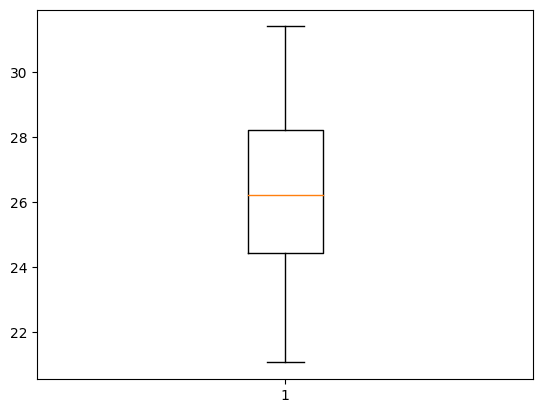

In [26]:
plt.boxplot(data['temperature'])

<ipython-input-27-622596a2b68e>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['temperature'])


<Axes: xlabel='temperature', ylabel='Density'>

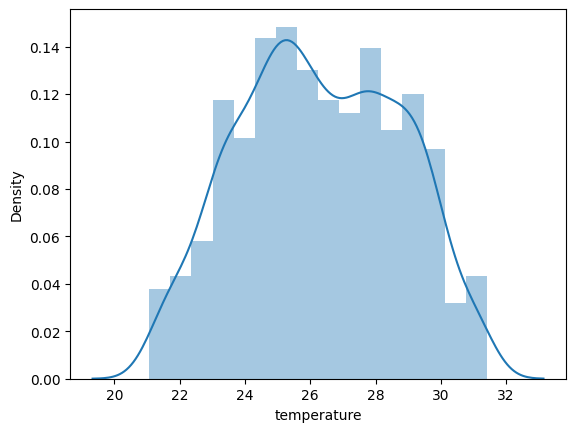

In [27]:
sns.distplot(data['temperature'])

**humidity column**





{'whiskers': [<matplotlib.lines.Line2D at 0x7f8d8495dac0>,
 'caps': [<matplotlib.lines.Line2D at 0x7f8d8496d040>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f8d8495d820>],
 'medians': [<matplotlib.lines.Line2D at 0x7f8d8496d580>],
 'fliers': [<matplotlib.lines.Line2D at 0x7f8d8496d820>],
 'means': []}

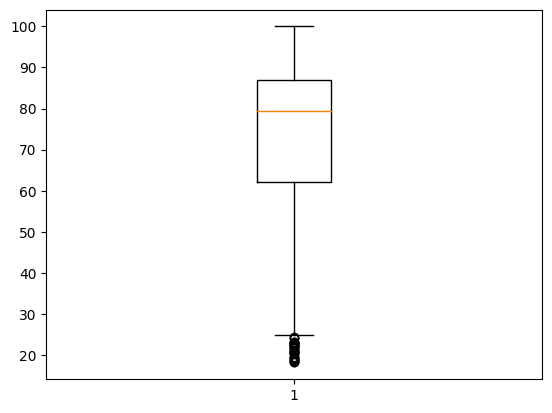

In [28]:
# Checking outliers
plt.boxplot(data['humidity'])

# Found some of outlier it will not effect predictinons will neglect

In [29]:
# removing outliers
q1= data['potassium'].quantile(0.25)
q3= data['potassium'].quantile(0.75)

iqr= q1-q3
lower_limit= q1 - 1.5 *iqr
upper_limit= q3 + 1.5 *iqr

new_data = data[(data['potassium'] < lower_limit) & (data['potassium'] > upper_limit)]
data = new_data



{'whiskers': [<matplotlib.lines.Line2D at 0x7f8d848e1070>,
 'caps': [<matplotlib.lines.Line2D at 0x7f8d848e15b0>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f8d848d1d90>],
 'medians': [<matplotlib.lines.Line2D at 0x7f8d848e1af0>],
 'fliers': [<matplotlib.lines.Line2D at 0x7f8d848e1d90>],
 'means': []}

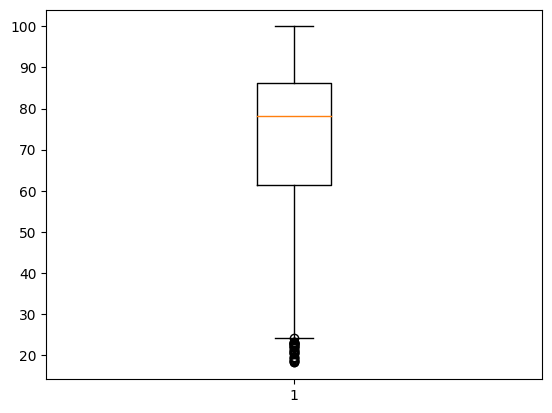

In [30]:
plt.boxplot(data['humidity'])

**ph column**

1. Soil pH is a measure of the acidity or alkalinity of the soil, and it is an important factor in plant growth and nutrient availability. 
2. The pH scale ranges from 0 to 14, with pH 7 being neutral, pH values below 7 indicating acidity, and pH values above 7 indicating alkalinity.

{'whiskers': [<matplotlib.lines.Line2D at 0x7f8d84851a30>,
 'caps': [<matplotlib.lines.Line2D at 0x7f8d84851e50>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f8d84851790>],
 'medians': [<matplotlib.lines.Line2D at 0x7f8d848633d0>],
 'fliers': [<matplotlib.lines.Line2D at 0x7f8d84863670>],
 'means': []}

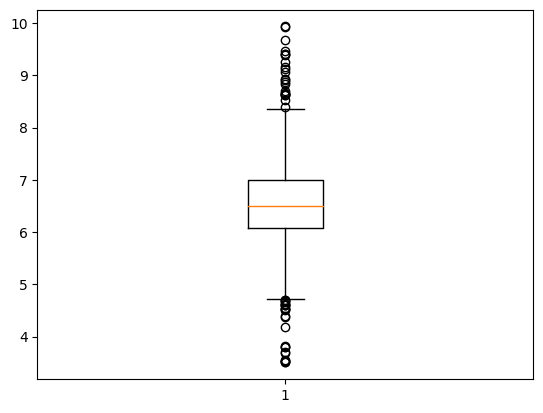

In [31]:
plt.boxplot(data['ph'])
# outliers found

In [32]:
# Treating outliers

q1= data['ph'].quantile(0.25)
q3= data['ph'].quantile(0.75)

iqr= q1-q3
lower_limit= q1 - 1.5 *iqr
upper_limit= q3 + 1.5 *iqr

new_data = data[(data['ph'] < lower_limit) & (data['ph'] > upper_limit)]
data = new_data


{'whiskers': [<matplotlib.lines.Line2D at 0x7f8d847cf040>,
 'caps': [<matplotlib.lines.Line2D at 0x7f8d847cf460>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f8d8483fd60>],
 'medians': [<matplotlib.lines.Line2D at 0x7f8d847cf9a0>],
 'fliers': [<matplotlib.lines.Line2D at 0x7f8d847cfc40>],
 'means': []}

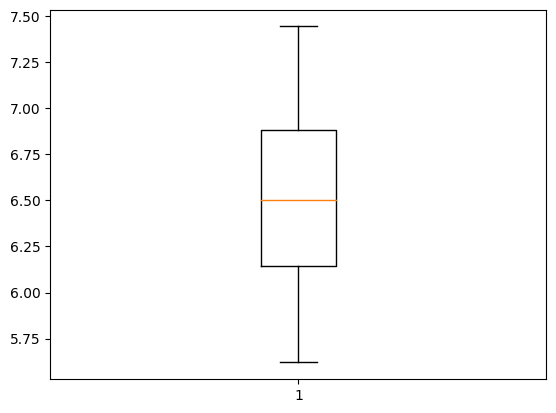

In [33]:
plt.boxplot(data['ph'])

<ipython-input-34-07442081b4a7>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['ph'])


<Axes: xlabel='ph', ylabel='Density'>

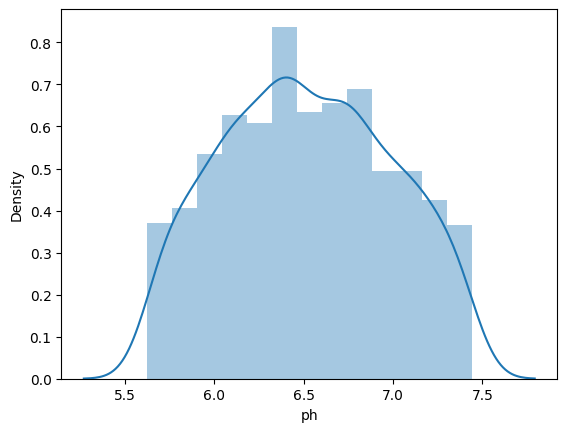

In [34]:
sns.distplot(data['ph'])

**rainfall column**

{'whiskers': [<matplotlib.lines.Line2D at 0x7f8d846e72b0>,
 'caps': [<matplotlib.lines.Line2D at 0x7f8d846e77f0>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f8d846d7fd0>],
 'medians': [<matplotlib.lines.Line2D at 0x7f8d846e7d30>],
 'fliers': [<matplotlib.lines.Line2D at 0x7f8d846e7fd0>],
 'means': []}

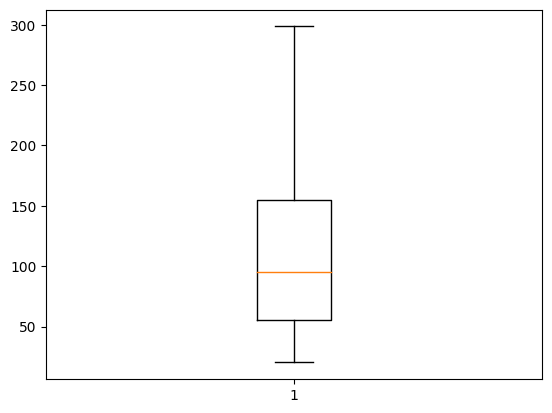

In [35]:
plt.boxplot(data['rainfall'])
# NO outliers found

<ipython-input-36-68674ff3ec4b>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['rainfall'])


<Axes: xlabel='rainfall', ylabel='Density'>

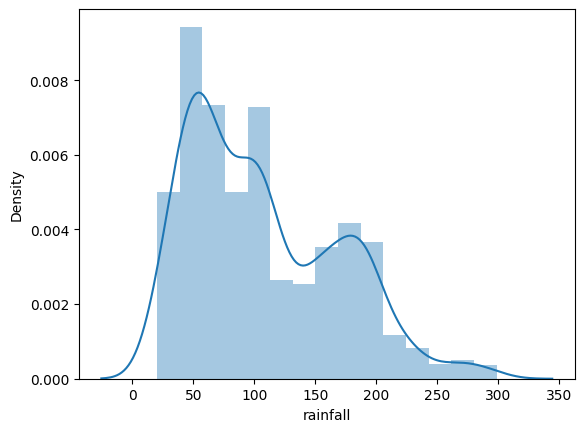

In [36]:
sns.distplot(data['rainfall'])

# **BiVeriat analysis**

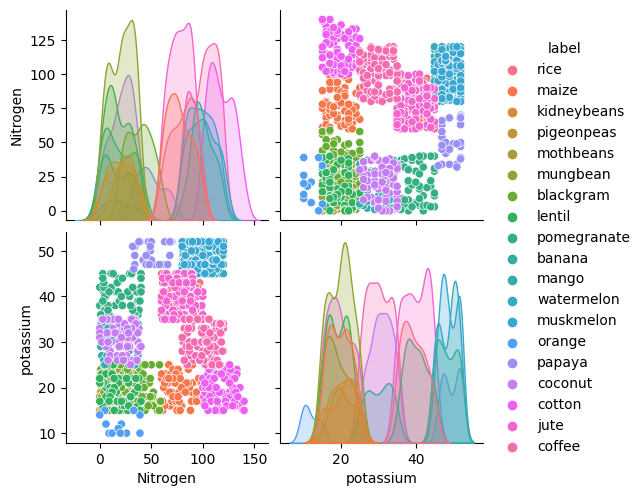

In [37]:
sns.pairplot(data, vars = ['Nitrogen', 'potassium'], hue = "label")

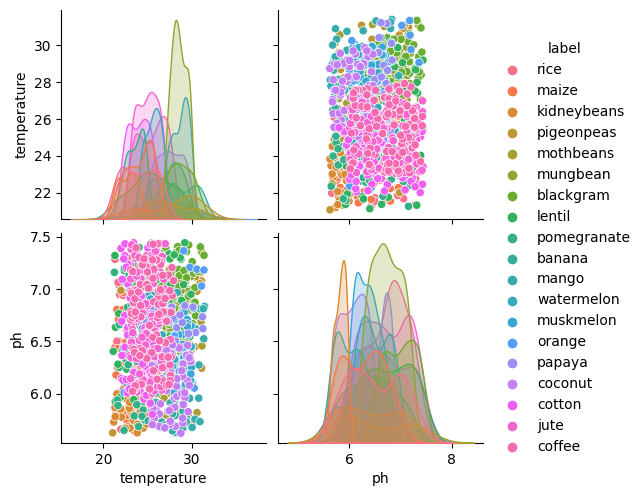

In [38]:
sns.pairplot(data, vars = ['temperature','ph'], hue = "label")

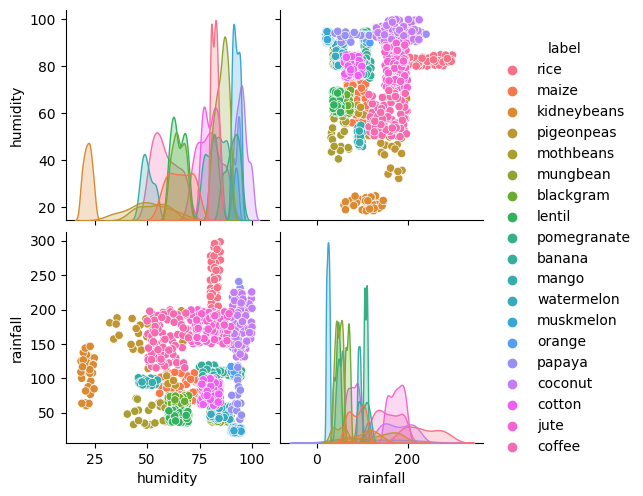

In [39]:
sns.pairplot(data, vars = ['humidity','rainfall'], hue = "label")

**Correlation**

Correlation is a statistical measure that describes the strength and direction of a relationship between two variables. It is often represented by a correlation coefficient, which is a numerical value that ranges between -1 and 1.

<ipython-input-40-3e5c6f30b522>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data.corr(), annot=True)


<Axes: >

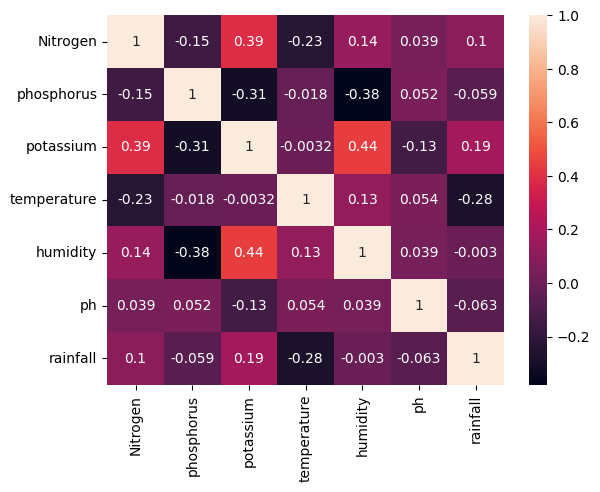

In [40]:
# Checking correlation 
sns.heatmap(data.corr(), annot=True)

# NO correlation found

In [41]:
data.dtypes

Nitrogen         int64
phosphorus       int64
potassium        int64
temperature    float64
humidity       float64
ph             float64
rainfall       float64
label           object
dtype: object

**Encoding Categorical veriable**

Encoding refers to the process of converting categorical data into numerical form 

In [42]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
data['label']=le.fit_transform(data['label'])


**Splitting Data**

In [43]:
from sklearn.model_selection import train_test_split
X=data.drop('label', axis=1)
y=data['label']

#X_train,X_test,y_train,y_test=train_test_split(X,y, test_size=0.20, random_state=42)

In [44]:
# Scalling data 

from sklearn.preprocessing import MinMaxScaler
scale=MinMaxScaler()
X=scale.fit_transform(X)

# **K-Means Model**

In [45]:
from sklearn.cluster  import KMeans
from sklearn.metrics import silhouette_score

km=KMeans(n_clusters=6, random_state=0)
km.fit(X)
silhouette = silhouette_score(X, km.labels_)
silhouette

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


0.3126385418380647

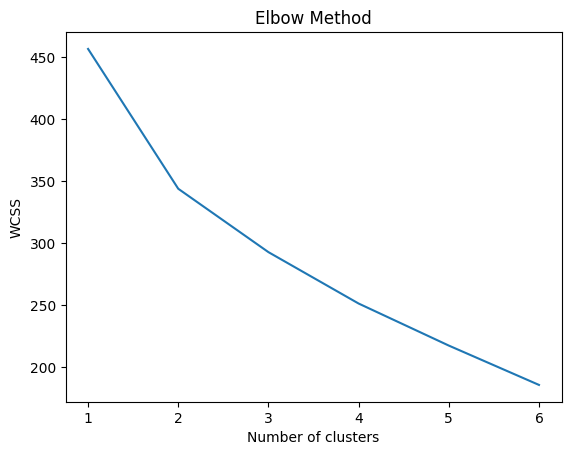

In [50]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# calculate WCSS for k=1 to k=10
wcss = []
for k in range(1, 7):
    kmeans = KMeans(n_clusters=k, init='k-means++', max_iter = 200, n_init = 10, random_state = 0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

# plot the results
plt.plot(range(1, 7), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()


1. By the above plot, we can see that there is a kink at k=2.

2. Hence k=2 can be considered a good number of the cluster to cluster this data.

# **Logistic Regression Model**

In [52]:
# Splitted data

X_train,X_test,y_train,y_test=train_test_split(X,y, test_size=0.20, random_state=42)

In [56]:
#Scalling data
from sklearn.preprocessing import StandardScaler
scale=StandardScaler()
x_train=scale.fit_transform(X_train)
x_test=scale.fit_transform(X_test)

In scikit-learn, the multi_class parameter can take on the following values:

1. 'ovr': one-vs-rest strategy (default)
2. 'ovo': one-vs-one strategy
3. 'multinomial': softmax regression

In [60]:
# MOdel fitting 

from sklearn.linear_model import LogisticRegression
lr=LogisticRegression(multi_class='ovr')
lr.fit(x_train,y_train)
lr.score(x_test,y_test)

0.910377358490566

In [66]:
from sklearn.metrics import roc_auc_score, f1_score, accuracy_score, confusion_matrix

y_pred=lr.predict(x_test)

accuracy_score(y_test, y_pred)

0.910377358490566

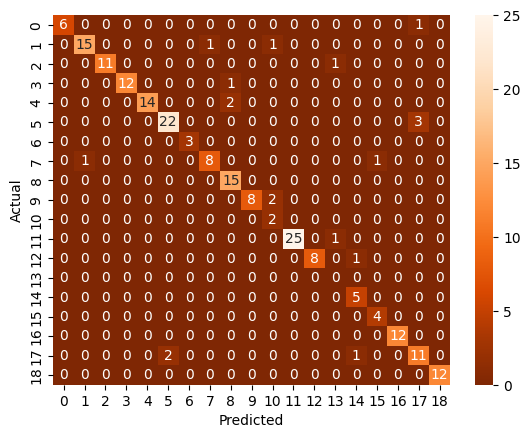

In [69]:
cm=confusion_matrix(y_pred,y_test)
sns.heatmap(cm, annot=True, cmap='Oranges_r', fmt='g')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# **Decision tree Model**

In [81]:
#Model without hyperparameter tuning 

from sklearn.tree import DecisionTreeClassifier

tree=DecisionTreeClassifier()
tree.fit(x_train,y_train)
tree.score(x_test,y_test)

0.9009433962264151

In [79]:
# MOdel with Hyper parameter tuning

from sklearn.tree import DecisionTreeClassifier

tree=DecisionTreeClassifier(max_depth=4)
tree.fit(x_train,y_train)
tree.score(x_test,y_test)

0.5518867924528302

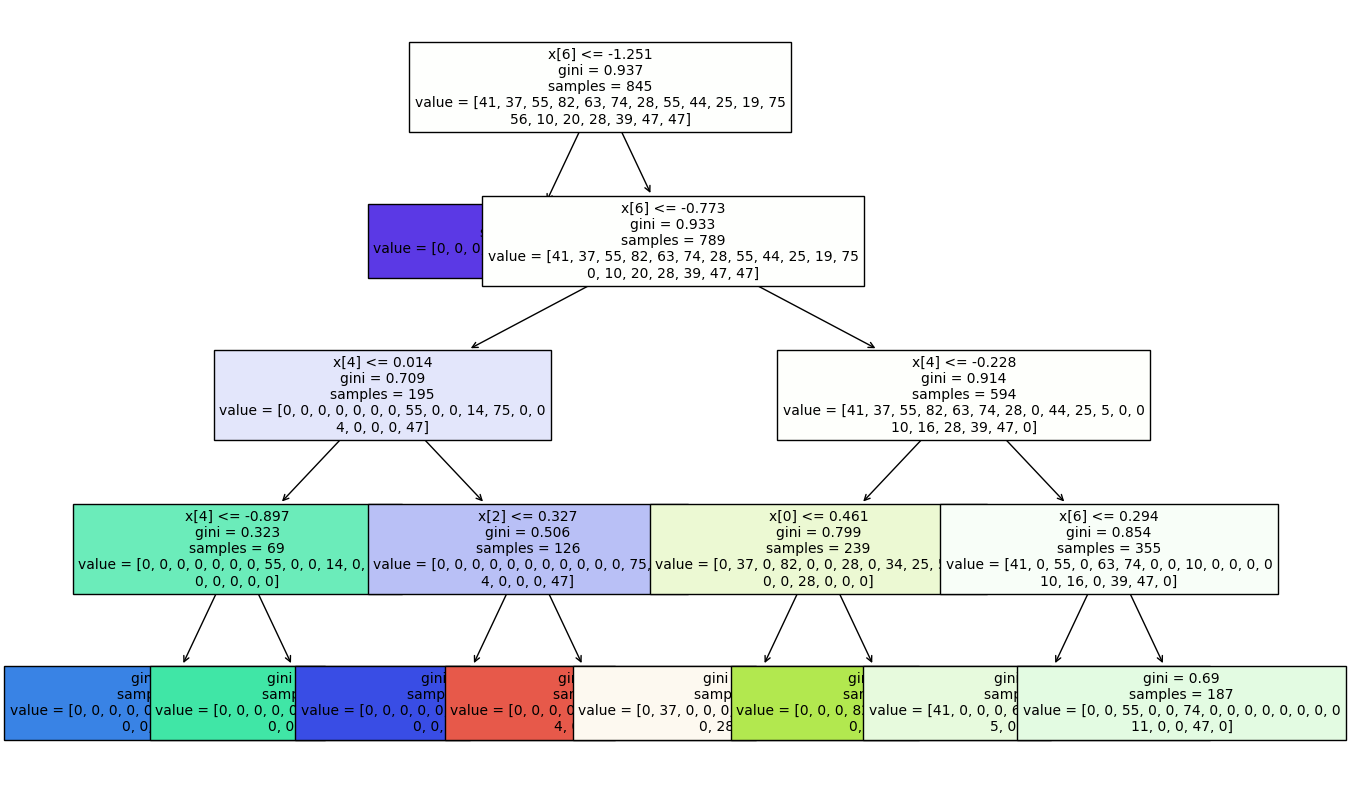

In [80]:
from sklearn.tree import plot_tree

fig, ax= plt.subplots(figsize=(15,10))
plot_tree(tree, fontsize=10, filled=True, ax=ax)
plt.show()